## Kaggle Advance House Price Prediction Using PyTorch

* https://docs.fast.ai/tabular.html

* https://www.fast.ai/2018/04/29/categorical-embeddings/

* https://yashuseth.blog/2018/07/22/pytorch-neural-network-for-tabular-data-with-categorical-embeddings/

In [1]:
import pandas as pd

### Importing the Dataset

In [2]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


### Unique Values in the Columns

In [6]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


### Derived Features

In [7]:
import datetime
datetime.datetime.now().year

2020

In [8]:
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,20


In [10]:
df.drop("YearBuilt",axis=1,inplace=True)

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

### Creating my Categorical Features

In [12]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [13]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

### Converting the categorical feature

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [15]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [17]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,17
1,0,3,80.0,9600,1,3,1262,0,181500,44
2,5,3,68.0,11250,1,0,920,866,223500,19
3,6,3,60.0,9550,1,0,961,756,140000,105
4,5,3,84.0,14260,1,0,1145,1053,250000,20


### Stacking and Converting Into Tensors

In [18]:
import numpy as np

cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

### Convert numpy to Tensors

**Note: CATEGORICAL FEATURES CAN NEVER BY CONVERTED TO FLOAT**

In [19]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

### Creating continuous variables

In [20]:
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [21]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

### Stacking continuous variables to a tensor

In [22]:
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [23]:
cont_values.dtype

torch.float32

### Dependent Feature

In [24]:
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [26]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [27]:
len(df['MSSubClass'].unique())

15

## Embedding Size For Categorical columns

In [28]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [29]:
cat_dims

[15, 5, 2, 4]

### Dimension of Output from the Embedding Layer

* Output dimension should be set based on the input dimension

* Should be min(50, feature dimension/2)

* **Not more than 50 categorical values can be used**

In [30]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [31]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

## Creating an Embedding Layer inside the Neural Network

* ModuleList is used because we have many dimensions (4) in the embedding layer.

* Embedding function creates the embedding layer using the list comprehension

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [33]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [34]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [35]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [36]:
embedding_val

[tensor([[-1.9940,  1.0335, -0.1425,  ..., -1.6050, -1.1309,  1.7972],
         [ 0.0833,  1.2504,  0.3971,  ..., -0.0728, -1.2149, -1.7660],
         [-1.9940,  1.0335, -0.1425,  ..., -1.6050, -1.1309,  1.7972],
         ...,
         [ 0.6523,  0.6793, -0.3254,  ..., -0.5404, -0.7510,  0.5988],
         [ 0.0833,  1.2504,  0.3971,  ..., -0.0728, -1.2149, -1.7660],
         [ 0.0833,  1.2504,  0.3971,  ..., -0.0728, -1.2149, -1.7660]],
        grad_fn=<EmbeddingBackward>), tensor([[ 0.6301, -0.8992,  0.4286],
         [ 0.6301, -0.8992,  0.4286],
         [ 0.6301, -0.8992,  0.4286],
         ...,
         [ 0.6301, -0.8992,  0.4286],
         [ 0.6301, -0.8992,  0.4286],
         [ 0.6301, -0.8992,  0.4286]], grad_fn=<EmbeddingBackward>), tensor([[0.5735],
         [0.5735],
         [0.5735],
         ...,
         [0.5735],
         [0.5735],
         [0.5735]], grad_fn=<EmbeddingBackward>), tensor([[ 0.9473,  0.5288],
         [ 0.9473,  0.5288],
         [-0.3506, -0.5410],
     

In [38]:
len(embedding_val[0][0])

8

### Stacking the embedded values column wise

In [39]:
z = torch.cat(embedding_val, 1)
z

tensor([[-1.9940,  1.0335, -0.1425,  ...,  0.5735,  0.9473,  0.5288],
        [ 0.0833,  1.2504,  0.3971,  ...,  0.5735,  0.9473,  0.5288],
        [-1.9940,  1.0335, -0.1425,  ...,  0.5735, -0.3506, -0.5410],
        ...,
        [ 0.6523,  0.6793, -0.3254,  ...,  0.5735,  0.9473,  0.5288],
        [ 0.0833,  1.2504,  0.3971,  ...,  0.5735,  0.9473,  0.5288],
        [ 0.0833,  1.2504,  0.3971,  ...,  0.5735,  0.9473,  0.5288]],
       grad_fn=<CatBackward>)

### Implement dropout - Regularization Method (Prevents Overfitting)

In [40]:
# 40% values are dropped out.

droput=nn.Dropout(.4)

In [41]:
final_embed=droput(z)
final_embed

tensor([[-3.3233,  0.0000, -0.2374,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  2.0839,  0.0000,  ...,  0.9558,  1.5788,  0.0000],
        [-0.0000,  1.7224, -0.2374,  ...,  0.9558, -0.5843, -0.9016],
        ...,
        [ 0.0000,  1.1322, -0.5424,  ...,  0.9558,  0.0000,  0.8814],
        [ 0.0000,  2.0839,  0.0000,  ...,  0.0000,  1.5788,  0.8814],
        [ 0.1389,  2.0839,  0.0000,  ...,  0.0000,  0.0000,  0.8814]],
       grad_fn=<MulBackward0>)

## Create a Feed Forward Neural Network

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))

        # Input feature = Embedding Layers + Continuous Variables
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [43]:
len(cont_features)

5

In [44]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

* ReLU activation function is used because it is a regression problem.

In [45]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

### Define Loss And Optimizer

In [46]:
model.parameters

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [47]:
# Later converted to Root Mean Squared Error

loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [48]:
df.shape

(1201, 10)

In [49]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [50]:
cont_values.shape

torch.Size([1201, 5])

In [51]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [52]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [53]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)

    # RMSE
    loss=torch.sqrt(loss_function(y_pred,y_train)) 
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.78125
Epoch number: 11 and the loss : 200493.4375
Epoch number: 21 and the loss : 200489.15625
Epoch number: 31 and the loss : 200482.609375
Epoch number: 41 and the loss : 200473.265625
Epoch number: 51 and the loss : 200461.359375
Epoch number: 61 and the loss : 200446.390625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.40625
Epoch number: 131 and the loss : 200252.0
Epoch number: 141 and the loss : 200206.625
Epoch number: 151 and the loss : 200162.25
Epoch number: 161 and the loss : 200112.25
Epoch number: 171 and the loss : 200059.796875
Epoch number: 181 and the loss : 200005.8125
Epoch number: 191 and the loss : 199946.1875
Epoch number: 201 and the loss : 199881.546875
Epoch number: 211 and the loss : 199815.828125
Epoch number

Text(0.5, 0, 'Epoch')

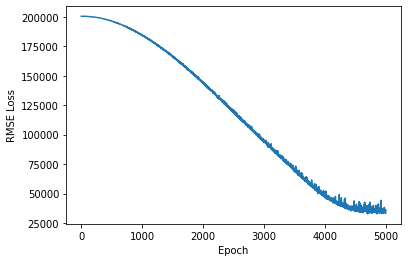

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('Epoch')

### Validate the Test Data

In [55]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 42693.4296875


In [56]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [57]:
data_verify

,Test
0,130000.0
1,138887.0
2,175500.0
3,195000.0
4,142500.0
5,265900.0
6,224900.0
7,248328.0
8,170000.0
9,465000.0


In [58]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [59]:
data_predicted

,Prediction
0,125071.664062
1,217297.359375
2,152125.906250
3,251757.046875
4,223750.671875
5,211186.015625
6,148613.609375
7,282291.125000
8,162473.953125
9,373956.031250


In [60]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,125071.664062,4928.335938
1,138887.0,217297.359375,-78410.359375
2,175500.0,152125.906250,23374.093750
3,195000.0,251757.046875,-56757.046875
4,142500.0,223750.671875,-81250.671875


## Save the model

In [62]:
torch.save(model,'HousePrice.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type FeedForwardNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [63]:
torch.save(model.state_dict(),'HouseWeights.pt')

### Loading the saved Model

In [64]:
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [65]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [66]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)